<h1><center>Project 2: Analyzing Airbnb Data in DMV areas</center></h1>

**<center>DATS 6103-O10<center>**
**<center>Weirui Liu<center>**

# II. Data Analyzing

Now that we have lodging data in the DMV area. Let's see what patterns emerge when looking holistically at all of the lodgings we scraped.

The CSV file that we're going to analyze come from 900 lodging’s information runs of the <u>Project2: Web Scraping</u> notebook on Nov 9, 2020.

## 1. Data Cleaning and Preprocessing

## 1.1 Import Package

In [1]:
# Import Packages

import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import squarify                            # algorithm for treemap
import seaborn as sns                      # data visualization library based on matplotlib
import plotly.graph_objects as go          # interactive data analysis with Plotly
from plotly.subplots import make_subplots  # construct figures with arbitrary subplots
from PIL import Image                      # represent a PIL image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # create WordCloud 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1.2 Read CSV File into DataFrame

In [3]:
# Concatenate all Washington DC csv

DC_data_lst = []
for i in range(20, 320, 20):
    data = pd.read_csv("Airbnb Washington DC {}-{} places.csv".format(i-20, i), sep = ",")
    DC_data_lst.append(data)
DC_data = pd.concat(DC_data_lst)

In [4]:
# drop unuseful column and add a area column

DC_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
DC_data['Area'] = 'Washington DC'

In [5]:
DC_data.head()

Type    Location  \
0   Entire apartment  Washington   
1       Private room  Washington   
2   Entire apartment  Washington   
3   Entire apartment  Washington   
4  Entire guesthouse  Washington   

                                              Title  Number of Guest  \
0          Private Basement-apt in Logan Circle DC!                2   
1  Private room w/ bathroom, cable TV, wifi, & ref.                2   
2         Major price reduction. A fabulous studio!                2   
3              Lovely apartment close to everything                4   
4                                      Garage Mahal                2   

   Number of Bedroom Studio  Number of Bed  Number of Bath Self Check-in  \
0                1.0     No            1.0             1.0           Yes   
1                1.0     No            1.0             1.0           Yes   
2                NaN    Yes            1.0             1.0           Yes   
3                1.0     No            1.0             1.0            No   
4                1.0     No            1.0             1.0            No   

  Air Conditioning  ... Free parking Elevator Gym Indoor fireplace Pool  \
0              Yes  ...           No       No  No               No   No   
1              Yes  ...           No       No  No               No   No   
2              Yes  ...           No       No  No               No   No   
3              Yes  ...           No       No  No               No   No   
4              Yes  ...          Yes       No  No              Yes   No   

  Rate (out of 5) Reviews Price (per Night)  \
0            4.48    26.0                53   
1            4.78    64.0                39   
2            4.92   393.0                63   
3            4.96   166.0                68   
4            4.60   287.0                31   

                                                Link           Area  
0  https://www.airbnb.com/rooms/16048230?previous...  Washington DC  
1  https://www.airbnb.com/rooms/28388898?previous...  Washington DC  
2  https://www.airbnb.com/rooms/8353034?previous_...  Washington DC  
3  https://www.airbnb.com/rooms/22535385?previous...  Washington DC  
4  https://www.airbnb.com/rooms/2091153?previous_...  Washington DC  

[5 rows x 25 columns]

In [6]:
# Concatenate all Virginia csv

VA_data_lst = []
for i in range(20, 320, 20):
    data = pd.read_csv("Airbnb Virginia {}-{} places.csv".format(i-20, i), sep = ",")
    VA_data_lst.append(data)
VA_data = pd.concat(VA_data_lst)

In [7]:
# drop unuseful column and add a area column

VA_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
VA_data['Area'] = 'Virginia'

In [8]:
VA_data.head()

Type    Location  \
0   Earth house    Broadway   
1          Yurt       Afton   
2  Entire cabin  Appomattox   
3  Entire cabin  Maurertown   
4  Entire cabin   Farmville   

                                               Title  Number of Guest  \
0                     Hobbit Style Underground Cabin                2   
1  Luxe Yurt w/Hot Tub in the Heart of the Blue R...                4   
2      Cozy and Private Riverfront Cabin on 50 Acres                2   
3  The Bear Den - Mountain Cabin w/ Spectacular V...                6   
4                              Weekend Getaway Cabin                4   

   Number of Bedroom Studio  Number of Bed  Number of Bath Self Check-in  \
0                1.0     No            1.0             1.0            No   
1                1.0     No            1.0             1.0            No   
2                1.0     No            1.0             1.0            No   
3                2.0     No            3.0             1.0           Yes   
4                1.0     No            1.0             1.0           Yes   

  Air Conditioning  ... Free parking Elevator Gym Indoor fireplace Pool  \
0              Yes  ...           No       No  No               No   No   
1              Yes  ...           No       No  No               No   No   
2              Yes  ...           No       No  No               No   No   
3              Yes  ...           No       No  No               No   No   
4              Yes  ...           No       No  No               No   No   

  Rate (out of 5) Reviews Price (per Night)  \
0            4.98    99.0               129   
1            5.00   406.0               157   
2            5.00    33.0               199   
3            5.00    56.0               189   
4            4.93   153.0               129   

                                                Link      Area  
0  https://www.airbnb.com/rooms/42388319?previous...  Virginia  
1  https://www.airbnb.com/rooms/14908682?previous...  Virginia  
2  https://www.airbnb.com/rooms/43466214?previous...  Virginia  
3  https://www.airbnb.com/rooms/39107053?previous...  Virginia  
4  https://www.airbnb.com/rooms/18506198?previous...  Virginia  

[5 rows x 25 columns]

In [9]:
# Concatenate all Maryland csv

MA_data_lst = []
for i in range(20, 320, 20):
    data = pd.read_csv("Airbnb Maryland {}-{} places.csv".format(i-20, i), sep = ",")
    MA_data_lst.append(data)
MA_data = pd.concat(MA_data_lst)

In [10]:
# drop unuseful column and add a area column

MA_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
MA_data['Area'] = 'Maryland'

In [11]:
MA_data.head()

Type        Location  \
0    Entire apartment  Lexington Park   
1  Entire guest suite     Catonsville   
2        Private room       Baltimore   
3          Tiny house   Saint Inigoes   
4        Entire cabin        Freeland   

                                               Title  Number of Guest  \
0      Adorable Waterfront Apartment Weekend Getaway                2   
1                             Cozy Catonsville Suite                2   
2                    Cozy Room2 -Shared Living Space                1   
3   Historic St.Mary's City at the Lazy Bear Cottage                2   
4  Peaceful Rustic Retreat, Wild Flowers & Farm V...                2   

   Number of Bedroom Studio  Number of Bed  Number of Bath Self Check-in  \
0                1.0     No            1.0             1.0            No   
1                1.0     No            1.0             1.0            No   
2                1.0     No            1.0             1.5            No   
3                1.0     No            1.0             1.0            No   
4                1.0     No            1.0             1.0            No   

  Air Conditioning  ... Free parking Elevator Gym Indoor fireplace Pool  \
0              Yes  ...           No       No  No               No   No   
1              Yes  ...           No       No  No               No   No   
2              Yes  ...           No       No  No               No   No   
3              Yes  ...           No       No  No               No   No   
4              Yes  ...          Yes       No  No              Yes   No   

  Rate (out of 5) Reviews Price (per Night)  \
0            5.00    82.0                80   
1            4.90   129.0                50   
2             NaN     NaN                17   
3            4.99   148.0                69   
4            5.00    26.0                84   

                                                Link      Area  
0  https://www.airbnb.com/rooms/36812815?previous...  Maryland  
1  https://www.airbnb.com/rooms/29596923?previous...  Maryland  
2  https://www.airbnb.com/rooms/43317323?previous...  Maryland  
3  https://www.airbnb.com/rooms/13544455?previous...  Maryland  
4  https://www.airbnb.com/rooms/36936064?previous...  Maryland  

[5 rows x 25 columns]

## 1.3 Concatenate three Data Sets

In [12]:
# Concatenate DMV data and delete duplicate rows

data = pd.concat([DC_data, VA_data, MA_data])
data.drop_duplicates(subset = ['Title'], inplace = True)
data.reset_index(drop = True, inplace = True)
data.index += 1

In [13]:
print(data.shape)
data

(706, 25)


Type          Location  \
1     Entire apartment        Washington   
2         Private room        Washington   
3     Entire apartment        Washington   
4     Entire apartment        Washington   
5    Entire guesthouse        Washington   
..                 ...               ...   
702   Entire apartment         Baltimore   
703      Entire chalet           McHenry   
704       Entire house  Chesapeake Beach   
705       Entire house     Silver Spring   
706       Entire house            Berlin   

                                                 Title  Number of Guest  \
1             Private Basement-apt in Logan Circle DC!                2   
2     Private room w/ bathroom, cable TV, wifi, & ref.                2   
3            Major price reduction. A fabulous studio!                2   
4                 Lovely apartment close to everything                4   
5                                         Garage Mahal                2   
..                                                 ...              ...   
702  Business district, convention center, indoor p...                4   
703                   Fish R Landing @ Deep Creek Lake               10   
704                      Staycation at Cozy Beach Home               11   
705  Enjoy beautiful scenery at fully equipped 2BR ...                4   
706   Dog-Friendly Berlin Home w/ Pool & Water Access!                6   

     Number of Bedroom Studio  Number of Bed  Number of Bath Self Check-in  \
1                  1.0     No            1.0             1.0           Yes   
2                  1.0     No            1.0             1.0           Yes   
3                  NaN    Yes            1.0             1.0           Yes   
4                  1.0     No            1.0             1.0            No   
5                  1.0     No            1.0             1.0            No   
..                 ...    ...            ...             ...           ...   
702                1.0     No            6.0             1.0           Yes   
703                3.0     No            6.0             2.0           Yes   
704                4.0     No            7.0             2.5           Yes   
705                2.0     No            2.0             1.0           Yes   
706                2.0     No            3.0             1.0            No   

    Air Conditioning  ... Free parking Elevator Gym Indoor fireplace Pool  \
1                Yes  ...           No       No  No               No   No   
2                Yes  ...           No       No  No               No   No   
3                Yes  ...           No       No  No               No   No   
4                Yes  ...           No       No  No               No   No   
5                Yes  ...          Yes       No  No              Yes   No   
..               ...  ...          ...      ...  ..              ...  ...   
702              Yes  ...           No       No  No               No   No   
703              Yes  ...           No       No  No               No   No   
704              Yes  ...           No       No  No               No   No   
705              Yes  ...           No       No  No               No   No   
706              Yes  ...           No       No  No               No   No   

    Rate (out of 5) Reviews Price (per Night)  \
1              4.48    26.0                53   
2              4.78    64.0                39   
3              4.92   393.0                63   
4              4.96   166.0                68   
5              4.60   287.0                31   
..              ...     ...               ...   
702             NaN     NaN                98   
703            4.78    49.0               276   
704            4.42    26.0               132   
705            5.00    13.0                78   
706            4.63    16.0               111   

                                                  Link           Area  
1    https://www.airbnb.com/rooms/16048230?previous...  Washingto

# 2. Data Exploration, Alalysis and Visualization

## 2.1 Common Location

Now, we have 706 unique lodging's information. Let's just see what the common location in the DMV area.

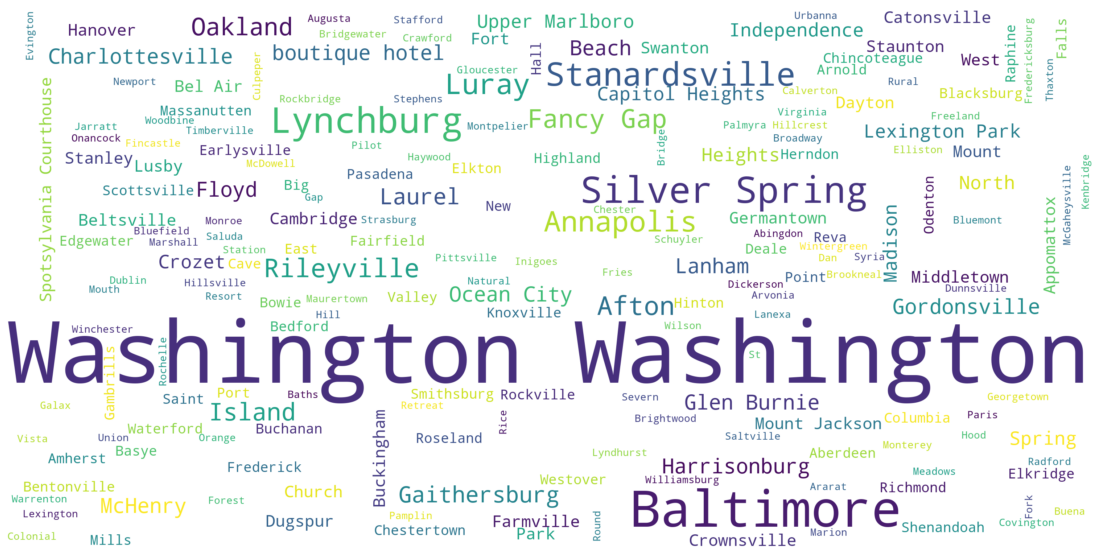

In [14]:
# Create a wordcloud to see what locations that comes up frequently

Location = " ".join(location for location in data['Location']) 

wordcloud = WordCloud(
                      width = 3000, 
                      height = 1500,
                      background_color = 'white',
                      max_font_size = 1000
                      ).generate(Location)

plt.figure(figsize = [30, 10])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Washington appears most frequently because the location of the Washington DC area only shows Washington. Outside of Washington DC, more lodging is loading in Baltimore and Silver Spring in Maryland, and Lynchburg and Stanardsville in Virginia.

## 2.2 Title Name Preference

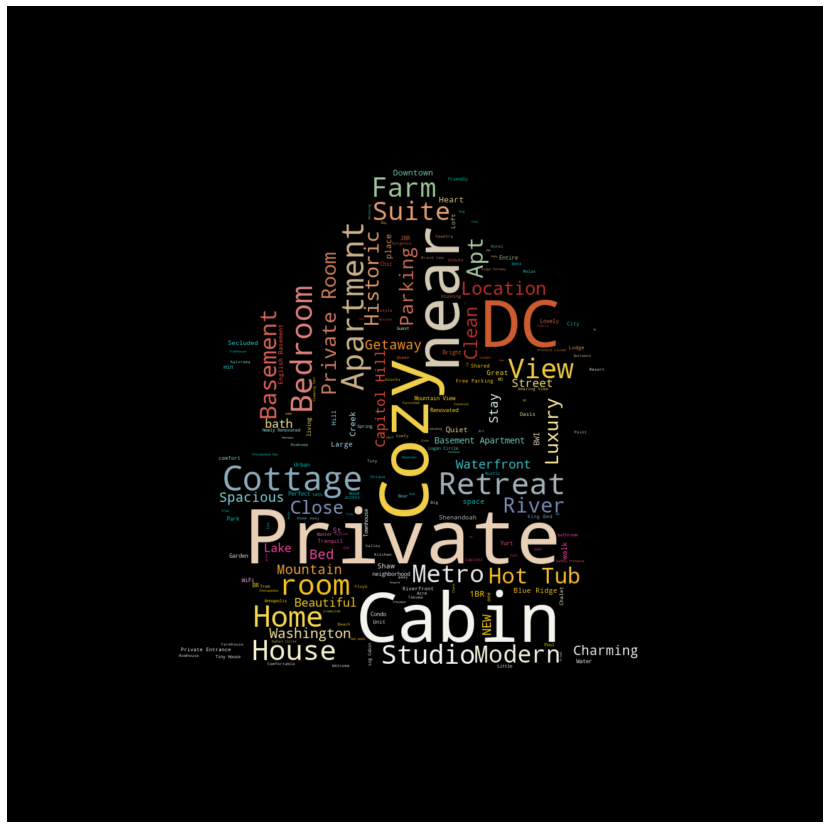

In [15]:
# Create a wordcloud to see what words in title that hosts created that comes up frequently

Title = " ".join(title for title in data['Title'])
mask = np.array(Image.open("House.jpg"))
wordcloud = WordCloud(
                      width = 4000, 
                      height = 2000,
                      background_color = 'black',
                      mask = mask
                      ).generate(Title)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [30,15])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis("off")
plt.show()

The words we can see most frequently are "Private," "Cabin," "Cozy," "near," and "DC." From the above word cloud, we can see that the title most hosts get describes the type of lodging. Surprisingly, many hosts prefer to use the word "Cozy" in the title.

## 2.3 Analysis of Property Type in DMV area

Now let's learn more about what kind of property types there are in the DMV area and their median prices in the DMV area.

In [16]:
# Count the number of each unique property type in DMV area
data_by_type_counts = data.groupby(by = ['Type']).size().reset_index(name = 'Counts')

# Calculaue the median price of each unique property type in DMV area (Since price range is large, median price makes more sense)
data_by_type_price = data.groupby(by = ['Type'])['Price (per Night)'].median().reset_index(name = 'Median Price (per Night)')

# Merge two datasets into one and sort count number in descending order
data_by_type_counts_price = pd.merge(data_by_type_counts, data_by_type_price, on=['Type'])
data_by_type_counts_price = data_by_type_counts_price.sort_values(['Counts'], ascending = False)
data_by_type_counts_price

Type  Counts  Median Price (per Night)
23               Private room     155                      35.0
7            Entire apartment     117                      76.0
9                Entire cabin      91                     151.0
15               Entire house      79                     132.0
12             Entire cottage      48                     130.5
13         Entire guest suite      45                      68.0
14          Entire guesthouse      26                      84.0
18           Entire townhouse      25                     118.0
19                  Farm stay      20                     134.0
11         Entire condominium      16                      72.5
17  Entire serviced apartment      14                     110.0
30                       Yurt      11                     103.0
27                 Tiny house       9                      93.0
10              Entire chalet       7                     206.0
24                       Room       5                      79.0
29                  Treehouse       5                     249.0
16                Entire loft       5                      60.0
25                Shared room       5                      28.0
0                        Barn       4                     157.5
22                 Hotel room       3                     119.0
20                Hostel beds       2                      37.0
8             Entire bungalow       2                      96.5
2                         Bus       2                      55.5
26                       Tent       2                      66.0
28                       Tipi       2                      81.0
3                    Campsite       1                      61.0
4                      Castle       1                      76.0
5                  Dome house       1                      96.0
1                        Boat       1                     119.0
6                 Earth house       1                     129.0
21                 Hotel beds       1                      45.0

In [17]:
# Create a pie chart to display the percentage of each unique property type of lodging and their median prices
# per night in DMV area

pull = [0] * 30
pull[0] = 0.1

pie_DMV = go.Pie(
                 labels = data_by_type_counts_price['Type'],
                 values = data_by_type_counts_price['Counts'],
                 text = data_by_type_counts_price['Median Price (per Night)'],
                 pull = pull,
                 name = 'DMV area'
                )

d = [pie_DMV]

layout = go.Layout(
                   height = 600,
                   width = 1000,
                   title = go.layout.Title(text = 'The Percentage of each Property Type of Lodging in DMV Area ' + '({} types)'.format(data_by_type_counts_price.shape[0]) + '<br>Hover For Median Price (per Night)'),
                   legend = dict(title = "Type:",
                                 yanchor = "top",
                                 y = 1.0,
                                 xanchor="left",
                                 x = -0.7)
                   )
fig = go.Figure(data = d, layout = layout)

fig.update_traces( 
                  hovertemplate = '<b>%{label}:</b><br>Counts: %{value} </br>Median Price (per Night): %{text: $.1f}',
                  texttemplate = '<b>%{label}:</b> %{percent} (%{value})',   
                  textposition = 'auto'
                  )

fig.show()

Today, there are 31 types of property types in the DMV area, the largest one being the private room, and the largest one is the entire apartment, the entire house, and the entire house. There are also particular property types such as Earth house, Boat, Dome house, Castle, etc.

Let's take a close look what kind of property types there are in the different area and their median prices in different area.

In [18]:
# Count the number of property type of lodging in different area
data_by_area_type_counts = data.groupby(by = ['Area', 'Type']).size().reset_index(name = 'Counts')

# Calculate the median price of different property type of lodging in different area
data_by_area_type_price = data.groupby(by = ['Area', 'Type'])['Price (per Night)'].median().reset_index(name = 'Median Price (per Night)')

# Merge two datasets into one and sort count number in ascending order
data_by_area_type_counts_price = pd.merge(data_by_area_type_counts, data_by_area_type_price, on=['Area', 'Type'])
data_by_area_type_counts_price = data_by_area_type_counts_price.sort_values(['Area', 'Counts'], ascending = True)
data_by_area_type_counts_price

Area                       Type  Counts  Median Price (per Night)
0        Maryland                       Boat       1                     119.0
14       Maryland                Shared room       1                      17.0
9        Maryland                Entire loft       2                      44.0
15       Maryland                 Tiny house       2                     104.0
16       Maryland                       Yurt       2                     143.0
3        Maryland              Entire chalet       3                     236.0
12       Maryland                  Farm stay       3                     379.0
10       Maryland  Entire serviced apartment       4                     119.0
4        Maryland         Entire condominium       7                      75.0
7        Maryland          Entire guesthouse       7                      91.0
11       Maryland           Entire townhouse      10                      48.0
2        Maryland               Entire cabin      13                     150.0
6        Maryland         Entire guest suite      17                      70.0
5        Maryland             Entire cottage      20                     173.0
1        Maryland           Entire apartment      25                      80.0
8        Maryland               Entire house      36                     149.5
13       Maryland               Private room      86                      32.0
19       Virginia                   Campsite       1                      61.0
20       Virginia                     Castle       1                      76.0
21       Virginia                 Dome house       1                      96.0
22       Virginia                Earth house       1                     129.0
34       Virginia                 Hotel room       1                     119.0
18       Virginia                        Bus       2                      55.5
24       Virginia            Entire bungalow       2                      96.5
27       Virginia         Entire condominium       2                      60.0
32       Virginia                Entire loft       2                      78.0
36       Virginia                       Tent       2                      66.0
38       Virginia                       Tipi       2                      81.0
17       Virginia                       Barn       4                     157.5
26       Virginia              Entire chalet       4                     200.0
39       Virginia                  Treehouse       5                     249.0
37       Virginia                 Tiny house       6                      92.5
29       Virginia         Entire guest suite       9                      60.0
40       Virginia                       Yurt       9                     102.0
23       Virginia           Entire apartment      12                      78.5
35       Virginia               Private room      13                      33.0
30       Virginia          Entire guesthouse      16                      83.5
33       Virginia                  Farm stay      17                     128.0
28       Virginia             Entire cottage      28                     124.5
31       Virginia               Entire house      28                     131.0
25       Virginia               Entire cabin      78                     151.5
46  Washington DC                Entire loft       1                      95.0
50  Washington DC                 Hotel beds       1                      45.0
55  Washington DC                 Tiny house       1                      99.0
49  Washington DC                Hostel beds       2                      37.0
51  Washington DC                 Hotel room       2                      99.5
44  Washington DC          Entire guesthouse       3                      77.0
54  Washington DC                Shared room       4                      28.5
53  Washington DC                       Room       5                      79.0
42  Washington DC         Entire condominium       7           

In [19]:
# Create four bar charts with dropdown menus to display the counts of different property types of lodging and 
# their median prices per night in a different area.

bar_DC = go.Bar(
                x = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Washington DC']['Counts'],
                y = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Washington DC']['Type'],
                text = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Washington DC']['Median Price (per Night)'],
                orientation = 'h',
                marker_color = 'gold',
                name = 'Washington DC'
                )

bar_VA = go.Bar(
                x = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Virginia']['Counts'],
                y = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Virginia']['Type'],
                text = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Virginia']['Median Price (per Night)'],
                orientation = 'h',
                marker_color = 'deepskyblue',
                name = 'Virginia'
                )

bar_MD = go.Bar(
                x = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Maryland']['Counts'],
                y = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Maryland']['Type'],
                text = data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Maryland']['Median Price (per Night)'],
                orientation = 'h',
                marker_color = 'pink',
                name = 'Maryland'
                )

d = [bar_DC, bar_VA, bar_MD]

layout = go.Layout(
                   height = 800, 
                   width = 1000,  
                   xaxis = dict(title = "Counts"),
                   yaxis = dict(title = "Property Type")
                  )

fig = go.Figure(data = d, layout = layout)

    
fig.update_layout(
                  barmode = 'stack',
                  updatemenus = [go.layout.Updatemenu(
                  active = 0, 
                  buttons = list([
                  dict(label =  'Comparison of DMV area',
                       method = 'update',
                       args = [{'showlegend':True}]), 
                      
                  dict(label = 'Washington DC',
                       method = 'update',
                       args = [{'visible': [True, False, False]}, 
                               {'title': 'Counts of Different Property Type of Lodging and Compare their Median Price in Washington DC ' + '({} types)'.format(data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Washington DC'].shape[0]),
                                'showlegend':True}]),
                      
                  dict(label = 'Virginia',
                       method = 'update',
                       args = [{'visible': [False, True, False]},
                               {'title': 'Counts of Different Property Type of Lodging and Compare their Median Price in Virginia ' + '({} types)'.format(data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Virginia'].shape[0]),
                                'showlegend':True}]),
                      
                  dict(label = 'Maryland',
                       method = 'update',
                       args = [{'visible': [False, False, True]},
                               {'title': 'Counts of Different Property Type of Lodging and Compare their Median Price in Maryland ' + '({} types)'.format(data_by_area_type_counts_price[data_by_area_type_counts_price['Area'] == 'Maryland'].shape[0]),
                                'showlegend':True}]),
                                 ]),
                      
                  direction = 'down',
                  pad = {'r': 10, 't': 10},
                  showactive = True,
                  x = -0.15,
                  xanchor = 'right',
                  y = 0.98,
                  yanchor = 'bottom'
                                                     ),
                  ])
fig.update_traces(
                  hovertemplate = "<b>%{y}:</b><br>Counts: %{x} </br>Median Price (per Night): %{text: $.1f}",
                  texttemplate = '%{text:$.1f}', 
                  textposition = 'auto'
                  )

fig.show()

For the Comparison of DMV Area Graph, we can see the distribution of different property types of lodging in different areas. We can compare the median price difference of the same type of lodging in different areas through the stacked bar chart. Use the Dropdown Menus to see the number of property types in an individual area and their median price in that area.

It can be seen from the above several pictures that Virginia has abundant property types of lodging. The number of data in the private room in Maryland, the entire cabin in Virginia, the entire Apartment in DC, and the private room in DC is quite prominent. When comparing the same property type of lodging, in most cases, where there are more of the number in this type, the lower the price of this type in that place.

(If want to see the Comparison of DMV Area Graph again, you have to rerun the plotting code again.)

## 2.4 Correlation Coefficients Between Variables

In [20]:
# convert boolean variables into dummy/indicator variables

data_amenities_dummies = pd.get_dummies(data, columns = ['Air Conditioning', 'Wifi', 'Washer', 'Kitchen', 'Breakfast', 'Pets allowed', 'Free parking', 'Elevator', 'Gym', 'Indoor fireplace', 'Pool'], drop_first = True)
data_amenities_dummies

Type          Location  \
1     Entire apartment        Washington   
2         Private room        Washington   
3     Entire apartment        Washington   
4     Entire apartment        Washington   
5    Entire guesthouse        Washington   
..                 ...               ...   
702   Entire apartment         Baltimore   
703      Entire chalet           McHenry   
704       Entire house  Chesapeake Beach   
705       Entire house     Silver Spring   
706       Entire house            Berlin   

                                                 Title  Number of Guest  \
1             Private Basement-apt in Logan Circle DC!                2   
2     Private room w/ bathroom, cable TV, wifi, & ref.                2   
3            Major price reduction. A fabulous studio!                2   
4                 Lovely apartment close to everything                4   
5                                         Garage Mahal                2   
..                                                 ...              ...   
702  Business district, convention center, indoor p...                4   
703                   Fish R Landing @ Deep Creek Lake               10   
704                      Staycation at Cozy Beach Home               11   
705  Enjoy beautiful scenery at fully equipped 2BR ...                4   
706   Dog-Friendly Berlin Home w/ Pool & Water Access!                6   

     Number of Bedroom Studio  Number of Bed  Number of Bath Self Check-in  \
1                  1.0     No            1.0             1.0           Yes   
2                  1.0     No            1.0             1.0           Yes   
3                  NaN    Yes            1.0             1.0           Yes   
4                  1.0     No            1.0             1.0            No   
5                  1.0     No            1.0             1.0            No   
..                 ...    ...            ...             ...           ...   
702                1.0     No            6.0             1.0           Yes   
703                3.0     No            6.0             2.0           Yes   
704                4.0     No            7.0             2.5           Yes   
705                2.0     No            2.0             1.0           Yes   
706                2.0     No            3.0             1.0            No   

     Rate (out of 5)  ...  Wifi_Yes  Washer_Yes Kitchen_Yes Breakfast_Yes  \
1               4.48  ...         1           0           1             0   
2               4.78  ...         1           1           0             0   
3               4.92  ...         1           0           1             0   
4               4.96  ...         1           1           1             0   
5               4.60  ...         1           0           0             0   
..               ...  ...       ...         ...         ...           ...   
702              NaN  ...         1           0           0             0   
703             4.78  ...         1           0           0             0   
704             4.42  ...         1           0           0             0   
705             5.00  ...         1           0           0             0   
706             4.63  ...         0           0           0             0   

     Pets allowed_Yes  Free parking_Yes  Elevator_Yes  Gym_Yes  \
1                   0                 0             0        0   
2                   0                 0             0        0   
3                   0                 0             0        0   
4                   0                 0             0        0   
5                   0                 1             0        0   
..                ...               ...           ...      ...   
702                 0                 0             0        0   
703                 0                 0             0        0   
704                 0                 0             0        0   
705                 0                 0             0        0   


In [21]:
# Create a correlation matrix to display the correlation coefficients between variables

corr = data_amenities_dummies.corr()
corr.style.background_gradient(cmap = 'YlOrBr', text_color_threshold = 0.5).set_precision(2)


The deeper the color, the highly correlate with each other between two variables. As can be seen from the above table, the number of guests, bedrooms, beds and baths has an impact on the price.

## 2.5 Analysis of Room Structure in DMV area

Next, let's look at the room structure and the number of guests that can be accommodated in different areas.

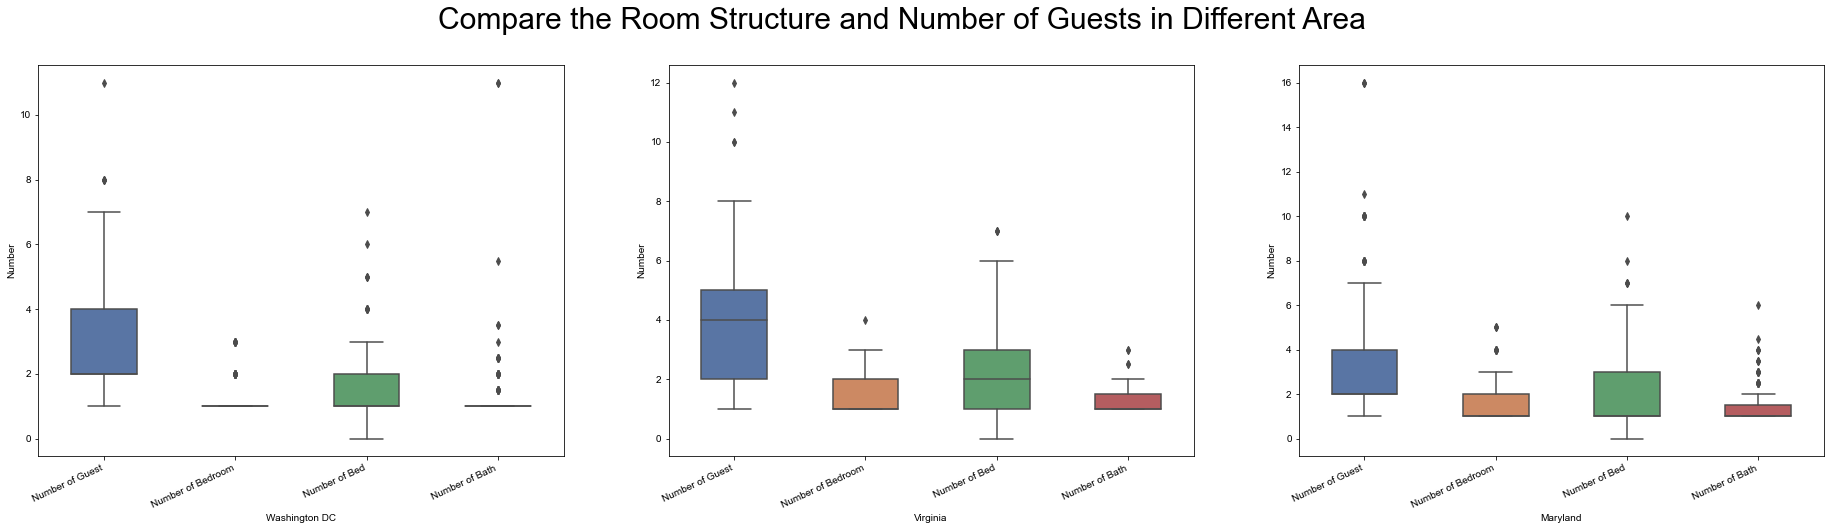

In [22]:
# Create a plot that contains three boxplot subplots to display different room structure and different number 
# of guests that can be accommodatedin a different area

fig, axes = plt.subplots(1, 3, figsize = (32, 8))

fig.suptitle('Compare the Room Structure and Number of Guests in Different Area', fontsize = 30)

sns.set(rc = {'axes.grid' : True,
              'axes.labelsize' : 25,
              'xtick.labelsize' : 18,
              'ytick.labelsize' : 20})

sns.boxplot(ax = axes[0], 
            data = data[data['Area'] == 'Washington DC'][['Number of Guest', 'Number of Bedroom', 'Number of Bed', 'Number of Bath']], 
            width = 0.5, 
           ).set(xlabel = 'Washington DC', ylabel = 'Number')

sns.boxplot(ax = axes[1], 
            data=data[data['Area'] == 'Virginia'][['Number of Guest', 'Number of Bedroom', 'Number of Bed', 'Number of Bath']],
            width = 0.5
           ).set(xlabel = 'Virginia', ylabel = 'Number')

sns.boxplot(ax = axes[2], 
            data=data[data['Area'] == 'Maryland'][['Number of Guest', 'Number of Bedroom', 'Number of Bed', 'Number of Bath']],
            width = 0.5
           ).set(xlabel = 'Maryland', ylabel = 'Number')

fig.autofmt_xdate(rotation = 25)
plt.show()

Most of the number of bedrooms, beds, and baths in the DMV area is between 1 and 3, and most of them are provided to 2 to 4 guests. However, there were some exceptions: There has lodging, which has 11 baths in Washington, DC, and lodging, which provides 16 guests in Maryland. Lodging in Washington, DC, provides most of its lodging to fewer guests than in the other two areas.

Look at the pattern between different room structures and prices in DMV area.

In [23]:
# To make the data more representative, drop rows that include NaN

data_structure = data[['Area', 'Number of Guest', 'Number of Bedroom', 'Number of Bed', 'Number of Bath', 'Price (per Night)']].dropna()
data_structure

Area  Number of Guest  Number of Bedroom  Number of Bed  \
1    Washington DC                2                1.0            1.0   
2    Washington DC                2                1.0            1.0   
4    Washington DC                4                1.0            1.0   
5    Washington DC                2                1.0            1.0   
6    Washington DC                2                1.0            1.0   
..             ...              ...                ...            ...   
702       Maryland                4                1.0            6.0   
703       Maryland               10                3.0            6.0   
704       Maryland               11                4.0            7.0   
705       Maryland                4                2.0            2.0   
706       Maryland                6                2.0            3.0   

     Number of Bath  Price (per Night)  
1               1.0                 53  
2               1.0                 39  
4               1.0                 68  
5               1.0                 31  
6               1.5                 32  
..              ...                ...  
702             1.0                 98  
703             2.0                276  
704             2.5                132  
705             1.0                 78  
706             1.0                111  

[628 rows x 6 columns]

In [24]:
# Create a 3d Scatter Plot to display each lodgings' room structure, number of guests, and price in the DMV area

fig = px.scatter_3d(
                    data_structure, 
                    x = 'Number of Guest', 
                    y = 'Number of Bedroom', 
                    z ='Number of Bed', 
                    size = 'Number of Bath',
                    size_max = 66,
                    color = 'Price (per Night)',
                    hover_name = 'Area'
                    )

fig.update_layout(
                  scene_zaxis_type = "log",
                  height = 600,
                  width = 1000,
                  title = go.layout.Title(text = "Different Room Structure of Lodging with their Price in DMV area")
                 )

fig.update_traces(hovertemplate = "<b>%{hovertext}:</b> <br>Number of Guest: %{x} </br>Number of Bedroom: %{y} </br>Number of Bed: %{z} </br>Number of Bath: %{marker.size} </br>Price (per Night): %{marker.color:$.1f}",)

fig.show()


A clear trend is evident in the 3D scatter plot: As bedrooms, beds, and numbers of guests increase, so do the prices of lodging. Many baths are either expensive (lodgings that can accommodate multiple customers, such as an entire house) or cheap (lodgings that only cater to one customer, such as a Shared room). Moreover, even with the same number of guests and similar room structures, there is still a significant price difference.

## 2.5 Analysis of Amenities and Facilities of  Lodging in DMV area

Next, let's look at some amenities and facilities that are most common in the lodgings in DMV area

In [25]:
# Count the number of amenities and facilities have in lodgings in DMV area

data_dmv_amenities_counts = data_amenities_dummies.iloc[:,-11:].sum().reset_index()
data_dmv_amenities_counts.rename(columns = {'index' : 'Type', 0 : 'Counts'}, inplace = True)
data_dmv_amenities_counts = data_dmv_amenities_counts.replace('_Yes','', regex = True)
data_dmv_amenities_counts

Type  Counts
0   Air Conditioning     559
1               Wifi     490
2             Washer      89
3            Kitchen     289
4          Breakfast      43
5       Pets allowed      27
6       Free parking     220
7           Elevator      22
8                Gym      19
9   Indoor fireplace      42
10              Pool       8

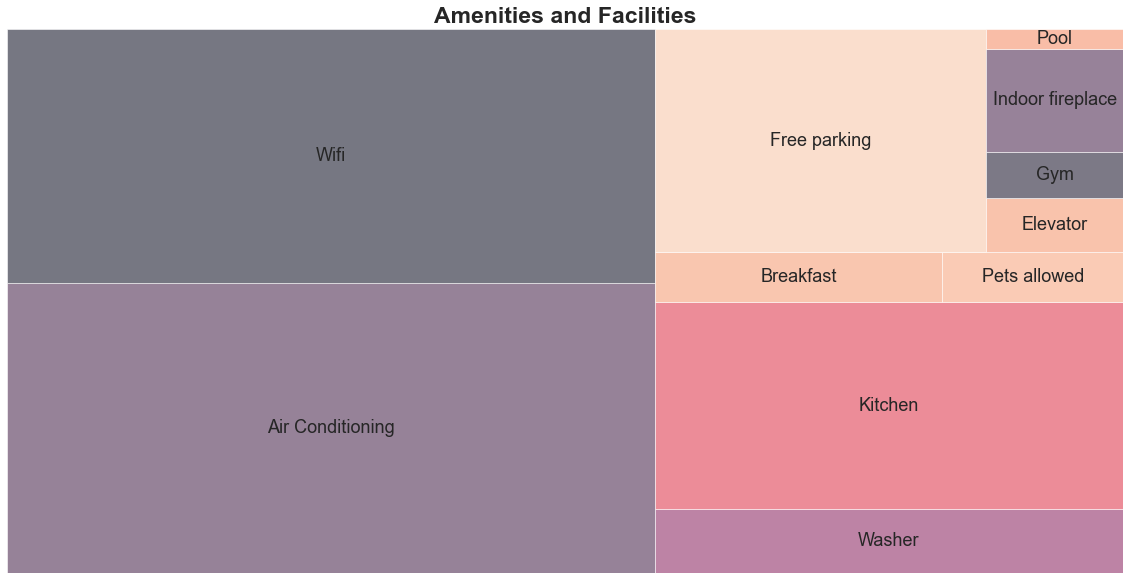

In [26]:
# Create a squarify tree plot to display proportion of each amenities and facilities

plt.figure(figsize = (20, 10))
squarify.plot(sizes = data_dmv_amenities_counts['Counts'], 
              label = data_dmv_amenities_counts['Type'],
              text_kwargs = {'fontsize': 18},
              alpha = 0.55)

plt.axis('off')
plt.title('Amenities and Facilities', fontsize = 23, fontweight = "bold")
plt.show()

It is the most common amenities and facilities in the lodgings in the DMV area, including Air conditioning, wifi, kitchen, and free parking.

Let's take a close look at the proportion of each amenities and facilities in different area.

In [27]:
data_area_amenities_dummies = data_amenities_dummies.iloc[:,-12:]

# Count the number of lodgings in different area
data_by_area_size = data.groupby(by = ['Area']).size().reset_index(name = 'Number of Lodgings')

# Sum the number of yes of each amenities and facilities
data_amenities_yes = data_area_amenities_dummies.groupby(['Area']).sum().reset_index()

# Calculate the percentage of each amenities and facilities in each area
data_amenities_percentage = data_amenities_yes.iloc[:,1:].div(data_by_area_size['Number of Lodgings'], axis = 0) * 100

# Remove the suffix of columns' name and add area column
data_amenities_percentage.columns = data_amenities_percentage.columns.str.replace(r'_Yes$', '')
data_amenities_percentage['Area'] = ['Maryland', 'Virginia', 'Washington DC']

# Transpose dataframe
data_amentities_percentage_transpose = data_amenities_percentage.set_index(['Area']).transpose().reset_index()
data_amentities_percentage_transpose.rename(columns = {'index' : 'Amentities and Facilities'}, inplace = True)
data_amentities_percentage_transpose

Area Amentities and Facilities   Maryland   Virginia  Washington DC
0             Air Conditioning  93.305439  68.699187      75.565611
1                         Wifi  92.050209  39.430894      78.280543
2                       Washer  20.083682   0.406504      18.099548
3                      Kitchen  44.769874  31.300813      47.511312
4                    Breakfast   2.092050   9.349593       6.787330
5                 Pets allowed   2.510460   2.032520       7.239819
6                 Free parking  36.401674  45.121951       9.954751
7                     Elevator   1.255230   0.000000       8.597285
8                          Gym   2.092050   0.000000       6.334842
9             Indoor fireplace  10.460251   1.626016       5.882353
10                        Pool   0.836820   0.000000       2.714932

In [28]:
# Create four bar charts with dropdown menus to display the proportion of each amenities and facilities 
# in different area.

bar_MD = go.Bar(
                x = data_amentities_percentage_transpose['Amentities and Facilities'],
                y = data_amentities_percentage_transpose['Maryland'], 
                marker_color = 'pink',
                name = 'Maryland'
                )

bar_VA = go.Bar(
                x = data_amentities_percentage_transpose['Amentities and Facilities'],
                y = data_amentities_percentage_transpose['Virginia'], 
                marker_color = 'deepskyblue',
                name = 'Virginia'
                )

bar_DC = go.Bar(
                x = data_amentities_percentage_transpose['Amentities and Facilities'],
                y = data_amentities_percentage_transpose['Washington DC'], 
                marker_color = 'gold',
                name = 'Washington DC'
                )

d = [bar_MD, bar_VA, bar_DC]

layout = go.Layout(
                   height = 600, 
                   width =1000,  
                   xaxis = dict(title = "Amentities and Facilities"),
                   yaxis = dict(title = "Percentage %")
                  )

fig = go.Figure(data = d, layout = layout)

fig.update_layout(
                  updatemenus = [go.layout.Updatemenu(
                  active = 0, 
                  buttons = list([
                  dict(label =  'Comparison of DMV Area',
                       method = 'update',
                       args = [{'showlegend':True}]), 
                      
                  dict(label = 'Maryland',
                       method = 'update',
                       args = [{'visible': [True, False, False]}, 
                               {'title': 'Percentage of Amentities and Facilities in Maryland',
                                'showlegend':True}]),
                      
                  dict(label = 'Virginia',
                       method = 'update',
                       args = [{'visible': [False, True, False]},
                               {'title': 'Percentage of Amentities and Facilities in Virginia',
                                'showlegend':True}]),
                      
                  dict(label = 'Washington DC',
                       method = 'update',
                       args = [{'visible': [False, False, True]},
                               {'title': 'Percentage of Amentities and Facilities in Washington DC',
                                'showlegend':True}]),
                                 ]),
                      
                  direction = 'down',
                  pad = {'r': 10, 't': 10},
                  showactive = True,
                  x = -0.05,
                  xanchor = 'right',
                  y = 1.0,
                  yanchor = 'bottom'
                                                     ),
                  ])

fig.update_traces(hovertemplate = "<b>%{x}:</b> <br>Percentage: %{y:.2f}%")

fig.show()

For the Comparison of DMV Area Graph, we can compare the percentages of each amenities and facility in different areas. Use the Dropdown Menus to see the proportion of each amenities and facilities in an individual area.

It can be seen from the above several pictures that the lodgings in Virginia offers a far fewer washer and wifi services than the other two areas. Not surprisingly, free parking is far less available in Washington DC than in the other two areas.

(If want to see the Comparison of DMV Area Graph again, you have to rerun the plotting code again.)

## 2.6 Popular Lodging with Best Price in DMV area

Popular means the highest rate with the most reviewed. And the best price represents the lowest price on this basis. Compare the top ten most popular with the best price lodgings in different areas. Look at if there have a difference between their property type, room structure, amenities and facilities they offer, and the average price.

In [29]:
# Sort variables

data_popular = data.sort_values(['Reviews', 'Rate (out of 5)', 'Price (per Night)'], ascending = (False, False, True))
data_popular.head(10)

Type       Location  \
268      Private room  Stanardsville   
235              Tipi      Fairfield   
113  Entire apartment     Washington   
24   Entire townhouse     Washington   
367  Entire apartment  Stanardsville   
64   Entire apartment     Washington   
166  Entire apartment     Washington   
52       Entire house     Washington   
215  Entire apartment     Washington   
223              Yurt          Afton   

                                                 Title  Number of Guest  \
268  Secluded Tree House (Safety Protocol Listed Be...                2   
235  Tipi with a great view of the Blue Ridge Mount...                3   
113   @ 14th & U – 99.9% Clean - 99 Walk Score - Metro                3   
24                  Brand new english basement in D.C.                3   
367           Suite Pea (Safety Protocol Listed Below)                2   
64   Modern luxury in Shaw, short walk 2 metro/conv...                4   
166                   Union Market Penthouse Apartment                4   
52                 Capitol Hill luxury English basment                4   
215                                      Cozy in Foggy                2   
223  Luxe Yurt w/Hot Tub in the Heart of the Blue R...                4   

     Number of Bedroom Studio  Number of Bed  Number of Bath Self Check-in  \
268                1.0     No            1.0             1.0           Yes   
235                NaN    Yes            1.0             1.0            No   
113                1.0     No            2.0             1.0           Yes   
24                 1.0     No            1.0             1.0           Yes   
367                1.0     No            1.0             1.0           Yes   
64                 1.0     No            2.0             1.0           Yes   
166                1.0     No            2.0             1.0           Yes   
52                 1.0     No            2.0             1.0           Yes   
215                NaN    Yes            1.0             1.0            No   
223                1.0     No            1.0             1.0            No   

    Air Conditioning  ... Free parking Elevator Gym Indoor fireplace Pool  \
268              Yes  ...           No       No  No               No   No   
235               No  ...           No       No  No               No   No   
113              Yes  ...           No       No  No               No   No   
24                No  ...           No       No  No               No   No   
367              Yes  ...          Yes       No  No               No   No   
64               Yes  ...           No       No  No               No   No   
166               No  ...           No       No  No               No   No   
52               Yes  ...           No       No  No              Yes   No   
215              Yes  ...           No       No  No               No   No   
223              Yes  ...           No       No  No               No   No   

    Rate (out of 5) Reviews Price (per Night)  \
268            4.81   718.0               139   
235            4.98   645.0                92   
113            4.88   562.0               124   
24             4.94   530.0                71   
367            4.75   484.0                79   
64             4.85   483.0                90   
166            4.44   443.0               124   
52             4.91   440.0               107   
215            4.84   408.0                67   
223            5.00   406.0               157   

                                                  Link           Area  
268  https://www.airbnb.com/rooms/886469?previous_p...       Virginia  
235  https://www.airbnb.com/rooms/12054355?previous...       Virginia  
113  https://www.airbnb.com/rooms/15373088?previous...  Washington DC  
24   https://www.airbnb.com/rooms/11640393?previous...  Washington DC  
367  https://www.airbnb.com/rooms/1608638?previous_...       Virginia  
64   https://www.airbnb.com/rooms/6135500?previous_...  Washington DC  

In [30]:
# Create four subplots to each area to display the top ten popular with best price lodgings' property type, 
# room structure, facilities and facilities they offer, and the summary of price and rate, separately.

# Create 12 subplots
fig = make_subplots(rows = 3, cols = 4, 
                    specs = [[{'type' : 'xy'}, {'type' : 'xy'}, {'type' : 'polar'}, {'type' : 'table'}],
                             [{'type' : 'xy'}, {'type' : 'xy'}, {'type' : 'polar'}, {'type' : 'table'}],
                             [{'type' : 'xy'}, {'type' : 'xy'}, {'type' : 'polar'}, {'type' : 'table'}]],
                    subplot_titles = ('', '', '', 'Washington DC', '', '', '', 'Virginia', '', '', '', 'Maryland'))


# Top 10 popular lodgings with best price in Washington DC

data_popular_DC = data_popular[data_popular['Area'] == 'Washington DC'][:10]

# The property type of top 10 popular lodgings with best price
data_popular_DC_type = data_popular_DC.groupby(by = ['Type']).size().reset_index(name = 'Counts')
data_popular_DC_type.sort_values(['Counts'], ascending = False, inplace = True)

# The amentities and facilities of top 10 popular lodgings with best price have
data_popular_DC_amenities = data_popular_DC[['Air Conditioning', 'Wifi', 'Washer', 'Kitchen', 'Breakfast', 'Pets allowed', 'Free parking', 'Elevator', 'Gym', 'Indoor fireplace', 'Pool']].transpose().reset_index()
data_popular_DC_amenities['Counts'] = (data_popular_DC_amenities.iloc[:, :] == 'Yes').sum(axis = 1)

# The statistical summary of price and rate of top 10 popular lodgings with best price
data_popular_DC_describe = data_popular_DC[['Rate (out of 5)', 'Reviews', 'Price (per Night)']].describe().reset_index()
data_popular_DC_describe = data_popular_DC_describe.iloc[[1,3,5,7],:]
data_popular_DC_describe.rename(columns = {'index':'Stateistics'}, inplace = True)
data_popular_DC_describe = data_popular_DC_describe.round(2)

trace1 = go.Bar(
                x = data_popular_DC_type['Type'],
                y = data_popular_DC_type['Counts'],
                marker_color = 'gold',
                hovertemplate = "<b>%{x}:</b> <br>Counts: %{y}",
                name = 'Washington DC'
                )

trace2 = go.Box(
                y = data_popular_DC['Number of Guest'],
                name = 'Number of Guest'
                )

trace3 = go.Box(
                y = data_popular_DC['Number of Bedroom'],
                name = 'Number of Bedroom'
                )

trace4 = go.Box(
                y = data_popular_DC['Number of Bed'],
                name = 'Number of Bed'
                )

trace5 = go.Box(
                y = data_popular_DC['Number of Bath'],
                name = 'Number of Bath'
                )

trace6 = go.Scatterpolar(
                         r = data_popular_DC_amenities['Counts'],
                         theta = data_popular_DC_amenities['index'],
                         fill = 'toself',
                         fillcolor = 'gold',
                         hovertemplate = "<b>%{theta}:</b> <br>Counts: %{r}",
                         opacity = 0.9,
                         hoverlabel = dict(bgcolor = 'gold'),
                         line = dict(color = 'gold'),
                         name = 'Washington DC'
                         )

trace7 = go.Table(
                  header = dict(values = list(data_popular_DC_describe.columns),
                                fill_color = 'gold',
                                font = dict(size = 12),
                                align = 'center'),
                  cells = dict(values = [data_popular_DC_describe['Stateistics'], data_popular_DC_describe['Rate (out of 5)'], data_popular_DC_describe['Reviews'], data_popular_DC_describe['Price (per Night)']],
                               align = 'center'))
                  
# display each trace in particual subplot
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 1, 3)
fig.append_trace(trace7, 1, 4)


# Top 10 popular lodgings with best price in Virginia

data_popular_VA = data_popular[data_popular['Area'] == 'Virginia'][:10]

data_popular_VA_type = data_popular_VA.groupby(by = ['Type']).size().reset_index(name = 'Counts')
data_popular_VA_type.sort_values(['Counts'], ascending = False, inplace = True)

data_popular_VA_amenities = data_popular_VA[['Air Conditioning', 'Wifi', 'Washer', 'Kitchen', 'Breakfast', 'Pets allowed', 'Free parking', 'Elevator', 'Gym', 'Indoor fireplace', 'Pool']].transpose().reset_index()
data_popular_VA_amenities['Counts'] = (data_popular_VA_amenities.iloc[:, :] == 'Yes').sum(axis = 1)

data_popular_VA_describe = data_popular_VA[['Rate (out of 5)', 'Reviews', 'Price (per Night)']].describe().reset_index()
data_popular_VA_describe = data_popular_VA_describe.iloc[[1,3,5,7],:]
data_popular_VA_describe.rename(columns = {'index':'Stateistics'}, inplace = True)
data_popular_VA_describe = data_popular_VA_describe.round(2)

trace11 = go.Bar(
                x = data_popular_VA_type['Type'],
                y = data_popular_VA_type['Counts'],
                marker_color = 'deepskyblue',
                hovertemplate = "<b>%{x}:</b> <br>Counts: %{y}",
                name = 'Virginia'
                )

trace22 = go.Box(
                y = data_popular_VA['Number of Guest'],
                name = 'Number of Guest'
                )

trace33 = go.Box(
                y = data_popular_VA['Number of Bedroom'],
                name = 'Number of Bedroom'
                )

trace44 = go.Box(
                y = data_popular_VA['Number of Bed'],
                name = 'Number of Bed'
                )

trace55 = go.Box(
                y = data_popular_VA['Number of Bath'],
                name = 'Number of Bath'
                )

trace66 = go.Scatterpolar(
                         r = data_popular_VA_amenities['Counts'],
                         theta = data_popular_VA_amenities['index'],
                         fill = 'toself',
                         fillcolor = 'deepskyblue',
                         hovertemplate = "<b>%{theta}:</b> <br>Counts: %{r}",
                         opacity = 0.9,
                         hoverlabel = dict(bgcolor = 'deepskyblue'),
                         line = dict(color = 'deepskyblue'),
                         name = 'Virginia'
                         )

trace77 = go.Table(
                  header = dict(values = list(data_popular_VA_describe.columns),
                                fill_color = 'deepskyblue',
                                font = dict(size = 12),
                                align = 'center'),
                  cells = dict(values = [data_popular_VA_describe['Stateistics'], data_popular_VA_describe['Rate (out of 5)'], data_popular_VA_describe['Reviews'], data_popular_VA_describe['Price (per Night)']],
                               align = 'center'))
                  
fig.append_trace(trace11, 2, 1)
fig.append_trace(trace22, 2, 2)
fig.append_trace(trace33, 2, 2)
fig.append_trace(trace44, 2, 2)
fig.append_trace(trace55, 2, 2)
fig.append_trace(trace66, 2, 3)
fig.append_trace(trace77, 2, 4)


# Top 10 popular lodgings with best price in Maryland

data_popular_MD = data_popular[data_popular['Area'] == 'Maryland'][:10]

data_popular_MD_type = data_popular_MD.groupby(by = ['Type']).size().reset_index(name = 'Counts')
data_popular_MD_type.sort_values(['Counts'], ascending = False, inplace = True)

data_popular_MD_amenities = data_popular_MD[['Air Conditioning', 'Wifi', 'Washer', 'Kitchen', 'Breakfast', 'Pets allowed', 'Free parking', 'Elevator', 'Gym', 'Indoor fireplace', 'Pool']].transpose().reset_index()
data_popular_MD_amenities['Counts'] = (data_popular_MD_amenities.iloc[:, :] == 'Yes').sum(axis = 1)

data_popular_MD_describe = data_popular_MD[['Rate (out of 5)', 'Reviews', 'Price (per Night)']].describe().reset_index()
data_popular_MD_describe = data_popular_MD_describe.iloc[[1,3,5,7],:]
data_popular_MD_describe.rename(columns = {'index':'Stateistics'}, inplace = True)
data_popular_MD_describe = data_popular_MD_describe.round(2)

trace111 = go.Bar(
                x = data_popular_MD_type['Type'],
                y = data_popular_MD_type['Counts'],
                marker_color = 'pink',
                hovertemplate = "<b>%{x}:</b> <br>Counts: %{y}",
                name = 'Maryland'
                )

trace222 = go.Box(
                y = data_popular_MD['Number of Guest'],
                name = 'Number of Guest'
                )

trace333 = go.Box(
                y = data_popular_MD['Number of Bedroom'],
                name = 'Number of Bedroom'
                )

trace444 = go.Box(
                y = data_popular_MD['Number of Bed'],
                name = 'Number of Bed'
                )

trace555 = go.Box(
                y = data_popular_MD['Number of Bath'],
                name = 'Number of Bath'
                )

trace666 = go.Scatterpolar(
                         r = data_popular_MD_amenities['Counts'],
                         theta = data_popular_MD_amenities['index'],
                         fill = 'toself',
                         fillcolor = 'pink',
                         hovertemplate = "<b>%{theta}:</b> <br>Counts: %{r}",
                         opacity = 0.9,
                         hoverlabel = dict(bgcolor = 'pink'),
                         line = dict(color = 'pink'),
                         name = 'Maryland'
                         )

trace777 = go.Table(
                  header = dict(values = list(data_popular_MD_describe.columns),
                                fill_color = 'pink',
                                font = dict(size = 12),
                                align = 'center'),
                  cells = dict(values = [data_popular_MD_describe['Stateistics'], data_popular_MD_describe['Rate (out of 5)'], data_popular_MD_describe['Reviews'], data_popular_MD_describe['Price (per Night)']],
                               align = 'center'))
                  
fig.append_trace(trace111, 3, 1)
fig.append_trace(trace222, 3, 2)
fig.append_trace(trace333, 3, 2)
fig.append_trace(trace444, 3, 2)
fig.append_trace(trace555, 3, 2)
fig.append_trace(trace666, 3, 3)
fig.append_trace(trace777, 3, 4)

fig.update_yaxes(title_text = 'Washington DC', row = 1, col = 1)
fig.update_yaxes(title_text = 'Virginia', row = 2, col = 1)
fig.update_yaxes(title_text = 'Maryland', row = 3, col = 1)

fig.update_layout(height = 1000,
                  width = 1450,
                  showlegend = False,
                  title_text = 'Compare Top 10 Popular Lodgings with Best Price in Different Area') 

fig.show()


The private room and the Entire apartment are both trendy in every areas. Popular lodging generally offers two to four customers, and the numbers of bedrooms, beds, and baths are between one and two. They all offer air conditioning, wifi, and a kitchen. It also will provide free parking, in addition to lodging at DC. Most of their reviews are above 4.8 and have at least 300 reviews, with average prices ranging from 60 to 140 dollar.

## 2.7 Interactive

Create an Interactive program to retrieve area, guests, rate, and price to return a list of recommended lodgings with the best price.

In [31]:
# Add Rate Scale column in dataframe

Rate_scale_lst = []
for i in data['Rate (out of 5)']:
    if i <= 3.5:
        Rate_scale_lst.append('Below 3.5')
    elif 3.5 < i <= 4.0:
        Rate_scale_lst.append('3.5-4.0')
    elif 4.0 < i <= 4.5:
        Rate_scale_lst.append('4.0-4.5')
    elif 4.5 < i <= 5.0:
        Rate_scale_lst.append('4.5-5.0')
    else:
        Rate_scale_lst.append('NaN')

data['Rate Scale'] = np.array(Rate_scale_lst)

In [32]:
# Add Price Scale column in dataframe

Price_scale_lst = []
for i in data['Price (per Night)']:
    if i <= 50:
        Price_scale_lst.append('Below 50')
    elif 50 < i <= 100:
        Price_scale_lst.append('50-100')
    elif 100 < i <= 150:
        Price_scale_lst.append('100-150')
    elif 150 < i <= 200:
        Price_scale_lst.append('150-200')
    elif i > 200:
        Price_scale_lst.append('Over 200')
    else:
        Price_scale_lst.append('NaN')

data['Price Scale'] = np.array(Price_scale_lst)

In [33]:
def main():
    print('Welcome to the Airbnb Filter and Recomendation in DMV area!') 
    
    Area = ''
    while Area != 'q':
        area_menu()
        Area = input('*** What are you going to stay in DMV area? (select number): ')
        response = area_filter(Area)
        if response == 'q':
            print('*** Quit the program successful!')
            break

def area_menu():
    print()
    print('DMV area')
    print()
    print('1. Washington DC')
    print('2. Virginia')
    print('3. Maryland')
    print('q. Quit the program')
    print()

    
def rate_scale_menu():
    print()
    print('Rate Scale')
    print()
    print('1. Below 3.5')
    print('2. 3.5 - 4.0')
    print('3. 4.0 - 4.5')
    print('4. 4.5 - 5.0')
    print('q. Quit the program')
    print()    
    

def price_scale_menu():
    print()
    print('Price Scale')
    print()
    print('1. Below $50')
    print('2. $50 - $100')
    print('3. $100 - $150')
    print('4. $150 - $200')
    print('5. Over $200')
    print('q. Quit the program')
    print()     


def area_filter(Area):
    print()
    if Area == '1':
        DC_data = data[data['Area'] == 'Washington DC']
        print('* {} results *'.format(DC_data.shape[0]))
        guest_filter(DC_data)
    elif Area == '2':
        VA_data = data[data['Area'] == 'Virginia']
        print('* {} results *'.format(VA_data.shape[0]))
        guest_filter(VA_data)
    elif Area == '3':
        MD_data = data[data['Area'] == 'Maryland']
        print('* {} results *'.format(MD_data.shape[0]))
        guest_filter(MD_data)
    else:
        return 'q'

        
def guest_filter(area_data):
    print()
    Guest = int(input('*** Add guest (number): '))
    print()
    area_guest_data = area_data[area_data['Number of Guest'] == Guest]
    if area_guest_data.shape[0] != 0:
        print('* {} results with below information *'.format(area_guest_data.shape[0]))
        area_guest_data_rate_count = area_guest_data.groupby(by = ['Rate Scale']).size().reset_index(name = 'Counts')
        print()
        print('***********************')
        print(area_guest_data_rate_count.set_index(['Rate Scale']))
        print('***********************')
        rate_filter(area_guest_data)
    else:
        print('*** Sorry, no result.')
       

    
def rate_filter(area_guest_data):
    print()
    rate_scale_menu()
    Rate = input('*** What is your expected rating? (select number): ')
    print()
    if Rate == '1':
        area_guest_rate_data = area_guest_data[area_guest_data['Rate Scale'] == 'Below 3.5']
        rate_return_function(area_guest_rate_data)  
    elif Rate == '2':
        area_guest_rate_data = area_guest_data[area_guest_data['Rate Scale'] == '3.5-4.0']
        rate_return_function(area_guest_rate_data)
    elif Rate == '3':
        area_guest_rate_data = area_guest_data[area_guest_data['Rate Scale'] == '4.0-4.5']
        rate_return_function(area_guest_rate_data)
    elif Rate == '4':
        area_guest_rate_data = area_guest_data[area_guest_data['Rate Scale'] == '4.5-5.0']
        rate_return_function(area_guest_rate_data)
    else:
        print('*** Sorry, no result.')

        
def rate_return_function(area_guest_rate_data):
    if area_guest_rate_data.shape[0] != 0:
        print('* {} results with below information *'.format(area_guest_rate_data.shape[0]))
        area_guest_rate_price_count = area_guest_rate_data.groupby(by = ['Price Scale']).size().reset_index(name = 'Counts')
        print()
        print('***********************')
        print(area_guest_rate_price_count.set_index(['Price Scale']))
        print('***********************')
        price_filter(area_guest_rate_data)
    else:
        print('*** Sorry, no result.') 

        
def price_filter(area_guest_rate_data):
    print()
    price_scale_menu()
    Price = input('*** What is your expected price? (select number): ')
    print()
    if Price == '1':
        area_guest_rate_price_data = area_guest_rate_data[area_guest_rate_data['Price Scale'] == 'Below 50']
        price_return_function(area_guest_rate_price_data)       
    elif Price == '2':
        area_guest_rate_price_data = area_guest_rate_data[area_guest_rate_data['Price Scale'] == '50-100']
        price_return_function(area_guest_rate_price_data)         
    elif Price == '3':
        area_guest_rate_price_data = area_guest_rate_data[area_guest_rate_data['Price Scale'] == '100-150']
        price_return_function(area_guest_rate_price_data)       
    elif Price == '4':
        area_guest_rate_price_data = area_guest_rate_data[area_guest_rate_data['Price Scale'] == '150-200']
        price_return_function(area_guest_rate_price_data)         
    elif Price == '5':
        area_guest_rate_price_data = area_guest_rate_data[area_guest_rate_data['Price Scale'] == 'Over 200']
        price_return_function(area_guest_rate_price_data)

        
def price_return_function(area_guest_rate_price_data):
    if area_guest_rate_price_data.shape[0] != 0:
        print()
        print('* {} results *'.format(area_guest_rate_price_data.shape[0]))
        print()
        print('******* Top 5 Recomendation *******')
        if area_guest_rate_price_data.shape[0] < 5:
            area_guest_rate_price_data.sort_values(['Reviews'], ascending = False, inplace = True)
            r = 0
            while r < area_guest_rate_price_data.shape[0]:
                print()
                title = [str(x) for x in area_guest_rate_price_data['Title']][r]
                rate = [str(x) for x in area_guest_rate_price_data['Rate (out of 5)']][r]
                reviews = [str(x) for x in area_guest_rate_price_data['Reviews']][r]
                price = [str(x) for x in area_guest_rate_price_data['Price (per Night)']][r]
                link = [str(x) for x in area_guest_rate_price_data['Link']][r]
                print('{}. {}'.format(r+1, title))
                print('******** {}({}) ********* ${}/night *********'.format(rate, reviews, price))
                print(link)
                print()
                r += 1
        else:         
            area_guest_rate_price_data.sort_values(['Reviews'], ascending = False, inplace = True)
            r = 0
            while r < 5:
                print()
                title = [str(x) for x in area_guest_rate_price_data['Title']][r]
                rate = [str(x) for x in area_guest_rate_price_data['Rate (out of 5)']][r]
                reviews = [str(x) for x in area_guest_rate_price_data['Reviews']][r]
                price = [str(x) for x in area_guest_rate_price_data['Price (per Night)']][r]
                link = [str(x) for x in area_guest_rate_price_data['Link']][r]
                print('{}. {}'.format(r+1, title))
                print('******** {}({}) ********* ${}/night *********'.format(rate, reviews, price))
                print(link)
                print()
                r += 1
    else:
        print('*** Sorry, no result.')

            
main()

Welcome to the Airbnb Filter and Recomendation in DMV area!

DMV area

1. Washington DC
2. Virginia
3. Maryland
q. Quit the program

*** What are you going to stay in DMV area? (select number): 1

* 221 results *

*** Add guest (number): 1

* 27 results with below information *

***********************
            Counts
Rate Scale        
4.0-4.5          4
4.5-5.0         10
NaN             13
***********************


Rate Scale

1. Below 3.5
2. 3.5 - 4.0
3. 4.0 - 4.5
4. 4.5 - 5.0
q. Quit the program

*** What is your expected rating? (select number): 4

* 10 results with below information *

***********************
             Counts
Price Scale        
50-100            1
Below 50          9
***********************


Price Scale

1. Below $50
2. $50 - $100
3. $100 - $150
4. $150 - $200
5. Over $200
q. Quit the program

*** What is your expected price? (select number): 1


* 9 results *

******* Top 5 Recomendation *******

1. Simple Bare Necessities
******** 4.57(186.0) *********

## 3. Conclusion

For customers, if you want to know whether the lodging you have selected is a good deal, you can refer to the analysis of the property type section and the room structure analysis section comprehensively to see the median price of the lodging you have selected in a particular type and the median price the cost of the same room structure in the area. You could judge whether you have overpaid or not. Refer to the amenities and facilities analysis section to compare the amenities and facilities you have to common amenities and facilities have in the area. Or simply use the interactive program to filter popular lodging with the best price.

For a host, if you want to be a lodging host in the DMV area and want your lodging to be liked by most people. Based on our latest data analysis, I have the following suggestions: 
1. When naming your lodging, specify the type of lodging and add some adjectives, such as "Cozy," to appeal to customers. 
2. Refer to the property type analysis section and the room structure analysis section to see which type of lodging and the room structure is more popular and how to price it to have a price advantage in the area. 
3. Refer to the amenities and facilities analysis section to see which amenities and facilities should be provided to have more competitive advantages. 
4. To decide the final pricing, combined with the popular lodging analysis report.

## 4. Learning Processes

This is the first time I've used Web scraping to grab the information I want from a web page, and I had no idea about it before. So I spent a lot of time watching the Web scraping tutorials, and I used Yelp web sites for the practice. In the process of fetching, I also learned to use regular expressions to extract the desired text. It was difficult, but I felt a sense of achievement after done.

I learned to show the multiple graphs with the dropdown menu and subplot. I did a better job in the detail optimization of the chart and the hover's text display than in the last project. I learned to use more visualization to show the corresponding data information, such as word cloud, squarify, 3D scatter plot, and scatterpolar. Finally, I made an Interactive program based on what I learned in class.

**So now that we know a litte more about the distribution of property type, the room structure, the proportion of amenities, and facilities in the DMV area, we have also summarized the general attributes of popular lodging with best price. Hopefully, this will help you better know lodging information in the DMV on Airbnb, whether you're a customer or a host.**

We can look at lodgings' information by specific places to stay.

If you want to see more, please follow the links to the [Zenodo](https://zenodo.org/record/4266825) page, or the [Web Scraping](https://weiruiliu.github.io/DATS_6103_O10_Project-2/Project%202%20Web%20Scraping.html) and [Analysis](https://weiruiliu.github.io/DATS_6103_O10_Project-2/Project%202%20Cleaning%20and%20Analyzing.html) GitHub pages.